# Chapter 1

## 存储基本知识

* bit/b 最小单位
* byte/B **字节**  1B = 8b
* kB,MB = 10^3,10^6 B
* kiB,MiB = 2^8,2^16 B
* 字符：两个字节

图像量化级别：L=2^k, L为灰度级别.

图像占用字节：$M*N*k$

---


## 基础操作

### 读取，矩阵运算

* 减法主要用于区分

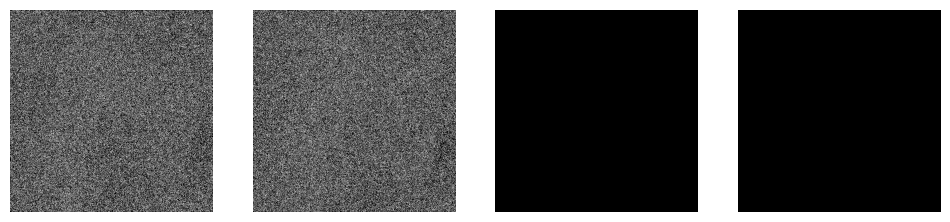

In [2]:
import cv2
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("lena.tif", 0)  # 参数：0=灰度，1=彩色, 彩色读取的是bgr,不是rgb.
# 读取图像,同上
img = cv2.imread('lena.tif', cv2.IMREAD_GRAYSCALE)


# 保存图像
cv2.imwrite("output.jpg", img)
cv2.imwrite("output.png", img)
cv2.imwrite("output.bmp", img)

# 再次读取
img_jpg = cv2.imread("output.jpg", 0)
img_png = cv2.imread("output.png", 0)
img_bmp = cv2.imread("output.bmp", 0)

# 做差值
img_jpg_png = -(img_jpg - img_png)
img_jpg_bmp = img_jpg - img_bmp
img_png_bmp = img_png - img_bmp
img_tif_png = - (img - img_png)

# 作图
ax = [0, 0, 0, 0,]
fig = plt.figure(figsize=(12, 4))

ax[0] = fig.add_subplot(1, 4, 1)
ax[1] = fig.add_subplot(1, 4, 2)
ax[2] = fig.add_subplot(1, 4, 3)
ax[3] = fig.add_subplot(1, 4, 4)

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[3].axis("off")

ax[0].imshow(
    img_jpg_png,
    cmap='gray',
)
ax[1].imshow(
    img_jpg_bmp,
    cmap='gray',
)
ax[2].imshow(
    img_png_bmp,
    cmap='gray',
)
ax[3].imshow(
    img_tif_png,
    cmap='gray',
)
plt.show()

* 经常使用乘法操作选区

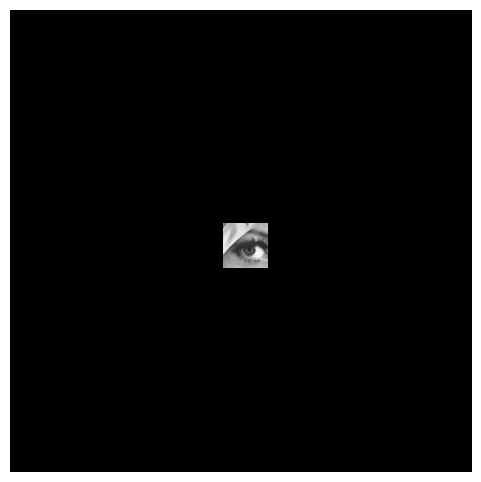

In [3]:
# 所谓图像相乘
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 读取图像
img = cv2.imread("lena.tif", 0)
img_para = np.zeros(
    img.shape,
    dtype=np.uint8
)
img_para[int(512/2)-20:int(512/2)+30, int(512/2)-20:int(512/2)+30] = 1
img_times_ipg_png = img * img_para

# 显示图像
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(
    img_times_ipg_png,
    cmap='gray',
)
plt.show()

* 旋转操作

其数学原理是正交变换：

二、考虑旋转中心的调整
实际应用中需要绕任意中心点(cx, cy)旋转，需进行以下三步变换：

​平移至原点​
将坐标系平移，使旋转中心与原点重合：

x1 = x - cx

y1 = y - cy

​应用基础旋转矩阵​

x2 = x1*cosθ - y1*sinθ

y2 = x1*sinθ + y1*cosθ

​反向平移恢复坐标系​

x' = x2 + cx

y' = y2 + cy



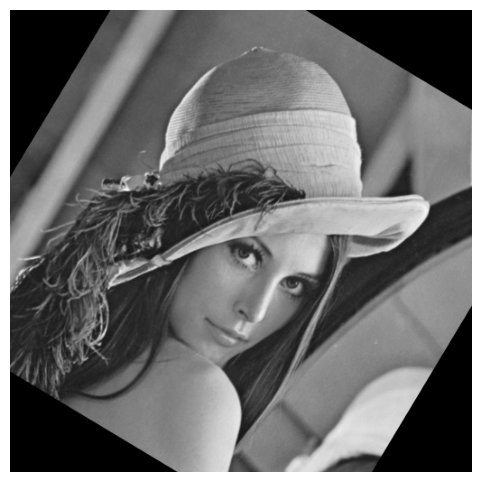

In [4]:
rows, cols = img.shape
M = cv2.getRotationMatrix2D(
    (cols/2, rows/2),
    -31,
    1,
)  # （中心点、角度、缩放因子）
rotated = cv2.warpAffine(
    img,
    M,
    (cols, rows),
)  # 指定输出图像的尺寸，此处保持与原图一致，但旋转后超出部分会被裁剪。

# 显示图像
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(
    rotated,
    cmap='gray',
)
plt.show()

* 颜色变换

转换有生物光学的转换公式，需要同时考虑照度和敏感度，非常无聊。

In [5]:
# !!BGR转灰度
img = cv2.imread("lena.tif", 1)  # 参数：0=灰度，1=彩色
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Notice: gray picture is a total numpy array.

cv2.imshow("gray_graph", gray)
cv2.waitKey(0)  # 等待按键
cv2.destroyAllWindows()

# BGR转HSV（用于颜色分割）(色相，饱和度，亮度)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow("gray_graph", hsv)
cv2.waitKey(0)  # 等待按键
cv2.destroyAllWindows()

# 灰度转BGR（伪彩色）
color_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)  # this sentence is invalid tmp.
cv2.imshow("gray_graph", color_img)
cv2.waitKey(0)  # 等待按键
cv2.destroyAllWindows()

# bgr transfor to rgb
# self.case1_rgb = cv2.cvtColor(self.case1_bgr, cv2.COLOR_BGR2RGB)


* resize

In [6]:
primal_width, primal_height = gray.shape
new_width, new_height = int(primal_width/2), int(primal_height/8)
# 缩放
resized = cv2.resize(img, (new_width, new_height))
cv2.imshow("gray_graph", resized)
cv2.waitKey(0)  # 等待按键
cv2.destroyAllWindows()

## 对比度调整

### 直方图

横轴为像素强度值，纵轴为出现频数。

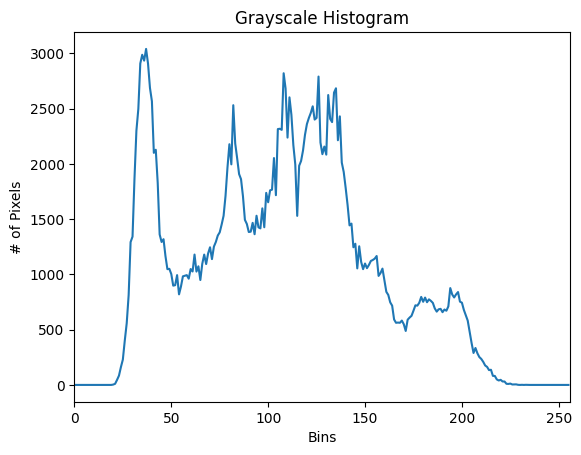

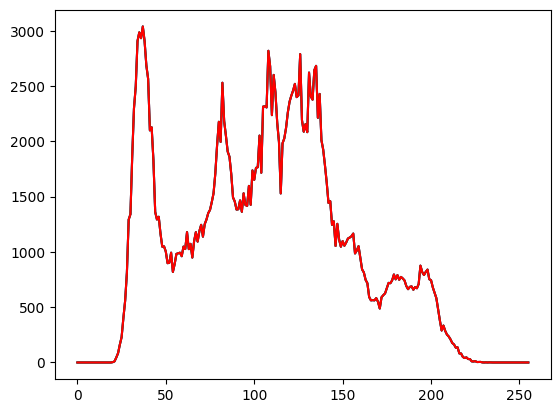

In [9]:
import matplotlib.pyplot as plt

# for graph pic
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])  # ？there is need more details.
"""
[gray]: list of image
[0]: gray,0; rgb,3
None: mask, None is equal all the image.
[256]: hist plot range
[0, 256]: the range to 统计

"""
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# for rgb pic, 但是我这里没有太大区别，r,g,b是几乎相同的。
colors = ("b", "g", "r")
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.show()


### 调整对比度

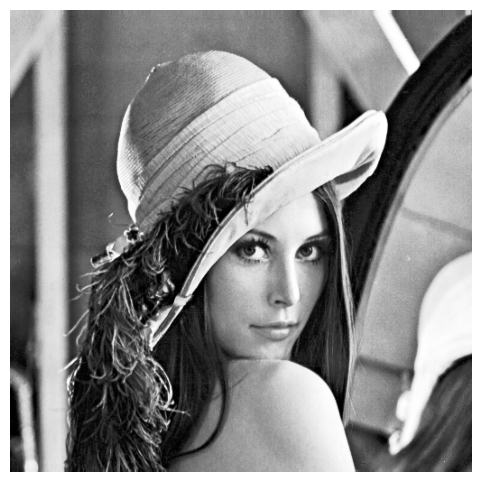

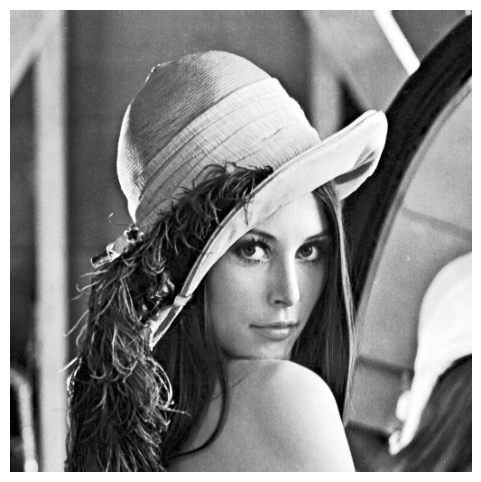

In [13]:
# 增强全局对比：

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)
# 显示图像
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(
    equalized,
    cmap='gray',
)
plt.show()

# 全局增强可能导致过曝问题，可使用局部增强，
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  # 增强幅度限制，分割子局域范围。
clahe_img = clahe.apply(gray)  #


# 对于rgb等图像应该转化为hsv专门对亮度通道进行对比度增强。
# 转换为 LAB 颜色空间（L: 亮度, A/B: 颜色通道）
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
# 分离通道
l, a, b = cv2.split(lab)
# 仅对亮度通道（L）进行直方图均衡化（也可以局部优化，这取决于你自己。）
l_eq = cv2.equalizeHist(l)
# 合并通道并转回 BGR
lab_eq = cv2.merge([l_eq, a, b])
bgr_eq = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

# 显示图像
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(
    bgr_eq,
    cmap='gray',
)
plt.show()

## 二值化调整

难点在阈值的选取，显然可以结合对比度的直方图。

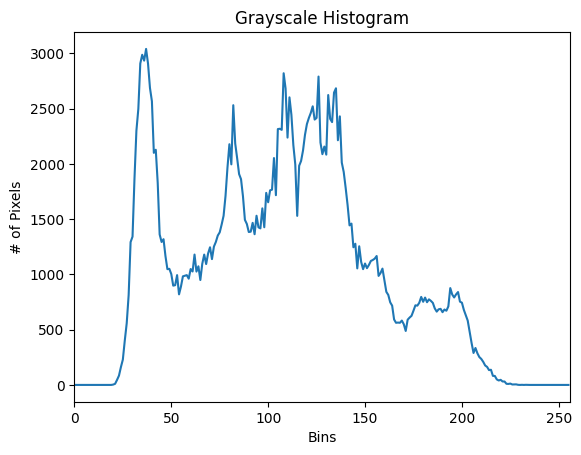

In [15]:
# !!BGR转灰度
img = cv2.imread("lena.tif", 1)  # 参数：0=灰度，1=彩色
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Notice: gray picture is a total numpy array.
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])  # ？there is need more details.

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

此处显然啊任选一个你喜欢的峰值都是可以的，这里我们选择60即可。

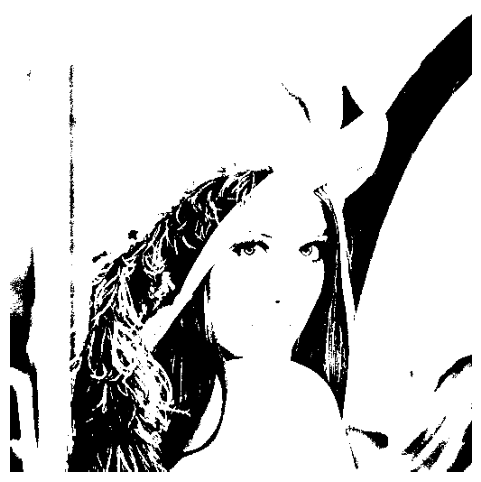

In [16]:
threshold = 60
gray[gray < threshold] = 0
gray[gray > threshold] = 255
# 显示图像
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(
    gray,
    cmap='gray',
)
plt.show()

* 自动二值化：

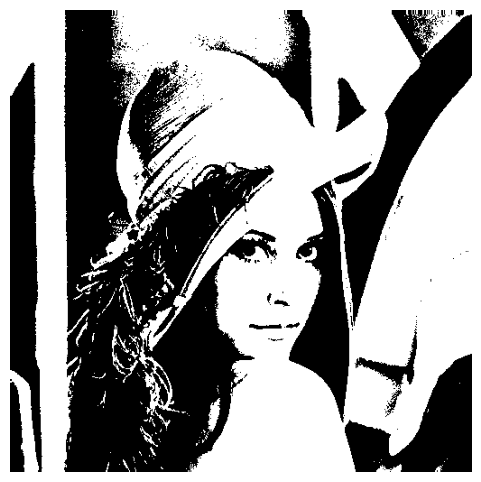

101.0


In [15]:
import cv2
import matplotlib.pyplot as plt

# 读取图像（确保为单通道灰度图）
img = cv2.imread('lena.tif', 0)

# 使用 Otsu 自动阈值二值化（前景为亮）
_, binary_img = cv2.threshold(
    src=img,                     # 输入灰度图像
    thresh=0,                    # 阈值占位符（Otsu 自动覆盖此值）
    maxval=255,                  # 最大值（高于阈值时赋予的值，白色）
    type=cv2.THRESH_BINARY | cv2.THRESH_OTSU  # 组合标志：二值化模式 + Otsu 自动阈值(cv2.THRESH_BINARY_INV 可变换前景)
)

plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(
    binary_img,
    cmap='gray',
)
plt.show()


* 自适应阈值

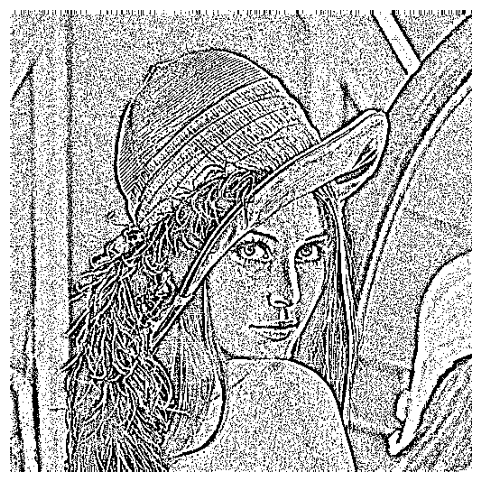

In [14]:
binary_img = cv2.adaptiveThreshold(
    src=img,                        # 输入图像（必须灰度图）
    maxValue=255,                   # 最大值（通常设为255）
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # 自适应方法
    thresholdType=cv2.THRESH_BINARY, # 二值化模式（cv2.THRESH_BINARY_INV 可以换为前景为暗）
    blockSize=7,                   # 邻域块大小（奇数），正方形
    C=2                             # 阈值微调常数(反人类，如100-2)
)
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(
    binary_img,
    cmap='gray',
)
plt.show()

## 滤波器

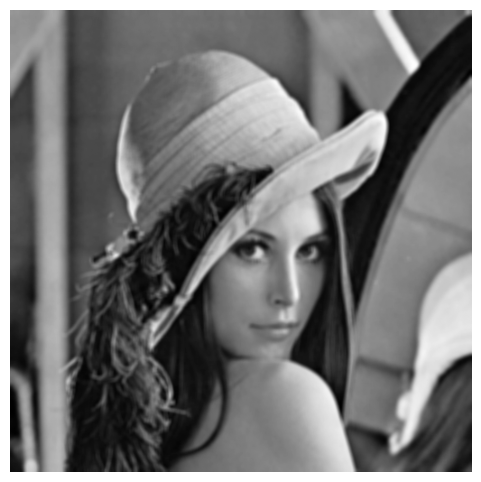

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("lena.tif", 0)  # 参数：0=灰度，1=彩色
n = 5  # 滤波器大小（n x n）
blurred = cv2.blur(img, (n, n))

plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(blurred, cmap='gray')
plt.show()

# 去除背景：结构元素和闭运算(先膨胀后腐蚀)。

膨胀亮色填充

腐蚀去除孤立亮斑

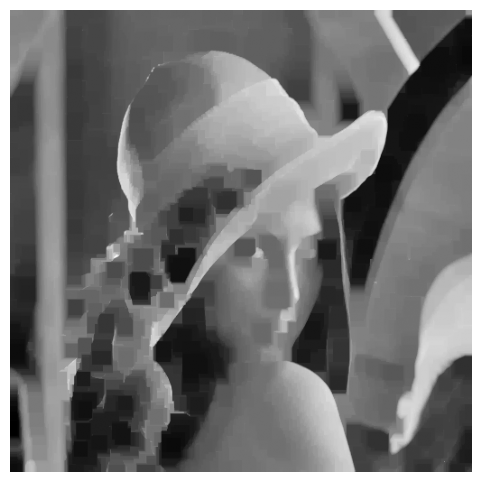

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像（假设前景为暗色，背景为亮色）
I = cv2.imread("lena.tif", cv2.IMREAD_GRAYSCALE)

# 定义结构元素（以矩形为例，核大小根据文本粗细调整）
kernel_size = (15, 15)  # 增大核尺寸可去除更粗的文本
SE = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
"""
核尺寸 (width, height) 需为奇数，根据目标特征粗细调整。

​矩形核（MORPH_RECT）​：
快速去除矩形区域内的小暗点，但可能残留斜向文本。
​椭圆核（MORPH_ELLIPSE）​：
更均匀地消除各方向细节，适合圆形或复杂形状背景。
​十字核（MORPH_CROSS）​：
针对细线状文本有效，但对块状文本效果较弱。
closed_case_1_matrix = cv2.bitwise_or(
    closed_case_1_matrix_h,
    closed_case_1_matrix_v
)  # 取并/交集一般有点用
closed_case_1_matrix = cv2.bitwise_and(
    closed_case_1_matrix_h,
    closed_case_1_matrix_v
)  # 取并/交集一般有点用
"""
# 执行闭运算：先膨胀后腐蚀，去除暗色细节
I_closed = cv2.morphologyEx(I, cv2.MORPH_CLOSE, SE)

# 显示结果
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(I_closed , cmap='gray')
plt.show()